In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
sns.set(style='darkgrid')

In [4]:
df = pd.read_excel('service.xlsx',date_parser='Job Card Date')
df.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [5]:
df['date_diff'] = df['Invoice Date']- df['Job Card Date']

In [6]:
df.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,0 days
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,2 days
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,2 days
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,2 days
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,2 days


In [7]:
#df['date_diff']=[x[:1] for x in df.date_diff.astype(str)] 
#df.replace(['-','N'],np.nan,inplace=True)
#Counter(df.date_diff)

In [9]:
df.head()
Counter(df.date_diff)

Counter({Timedelta('0 days 00:00:00'): 28066,
         Timedelta('2 days 00:00:00'): 23,
         Timedelta('3 days 00:00:00'): 83,
         Timedelta('4 days 00:00:00'): 16,
         Timedelta('1 days 00:00:00'): 233,
         Timedelta('5 days 00:00:00'): 47,
         Timedelta('19 days 00:00:00'): 7,
         Timedelta('16 days 00:00:00'): 2,
         Timedelta('-1 days +00:00:00'): 5,
         NaT: 2})

In [10]:
df[df.date_diff =='19 days']

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
8435,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,CHAIN LUBRICATION,19 days
8436,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,SEAT COVER,19 days
8437,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,TANK COVER,19 days
8438,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,ENGINE OIL,19 days
8439,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,AIR FILTER,19 days
8440,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,BRAKE SHOE,19 days
8441,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,WHEEL RUBBER,19 days


In [11]:
#Counter([x[:2] for x in df.date_diff.astype(str)] )
#df.isna().sum()
df.dropna(axis=0,inplace=True)

In [12]:
df.isna().sum()

Invoice Date             0
Job Card Date            0
Business Partner Name    0
Vehicle No.              0
Vehicle Model            0
Current KM Reading       0
INVOICE LINE TEXT        0
date_diff                0
dtype: int64

In [13]:
df['date_diff']=[int(x[:2].strip()) for x in df.date_diff.astype(str)]

In [14]:
df.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,2
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,2
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,2
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,2


In [15]:
df[df.date_diff==16]

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
9754,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,HEAD LIGHT DOOM,16
9755,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,LABOUR,16


In [16]:
df['INVOICE LINE TEXT']

0             ENGINE OIL
1             ENGINE OIL
2                 POLISH
3            CONSUMABLES
4            COOLANT OIL
              ...       
28477    SPROCKET RUBBER
28478       CLUTCH CABLE
28479         OIL FILTER
28480           DISC OIL
28481         AIR FILTER
Name: INVOICE LINE TEXT, Length: 28448, dtype: object

In [17]:
len(df['Job Card Date'])
df.groupby(['Job Card Date']).count().head()

,Invoice Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
Job Card Date,,,,,,,
2017-05-30,1,1,1,1,1,1,1
2017-05-31,40,40,40,40,40,40,40
2017-06-01,49,49,49,49,49,49,49
2017-06-02,16,16,16,16,16,16,16
2017-06-03,40,40,40,40,40,40,40


In [18]:
#len(df[df['Job Card Date']=='2017-05-31'])

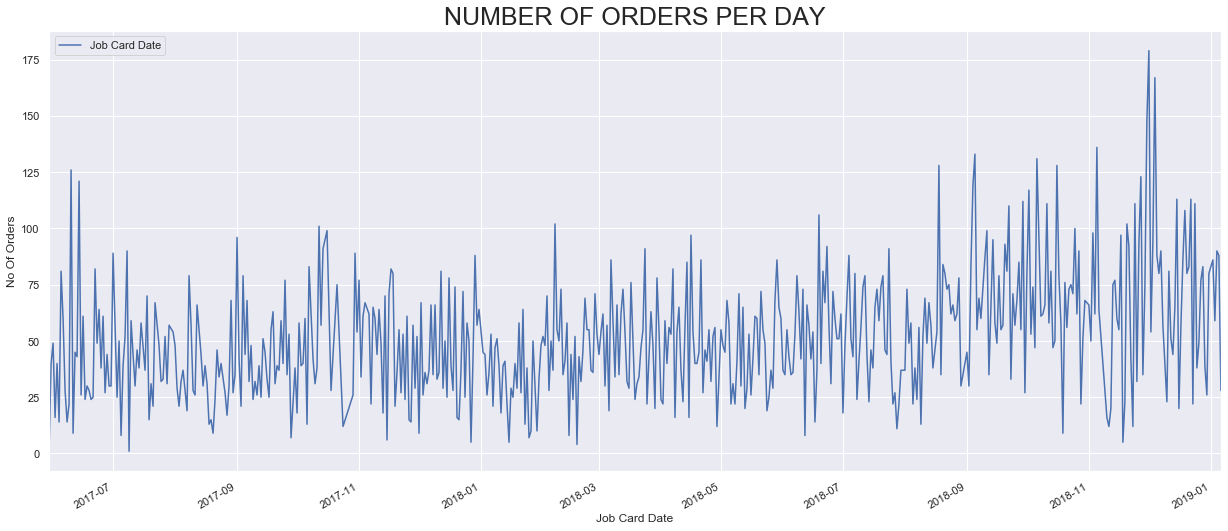

In [20]:
#plt.figure(figsize=[19,6])
df.groupby(['Job Card Date'])['Job Card Date'].count().to_frame().plot(figsize=[21,9]);
plt.title("NUMBER OF ORDERS PER DAY",fontdict={'fontsize':25});
plt.ylabel("No Of Orders");

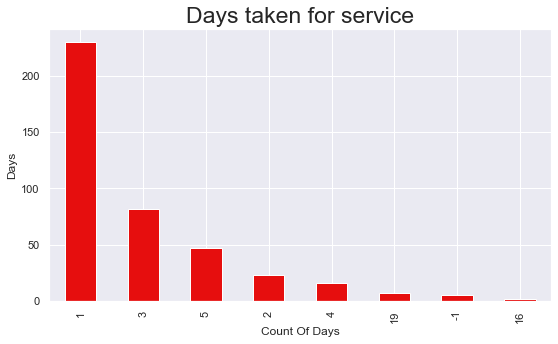

In [21]:
df.date_diff.value_counts()[1:].plot(kind='bar',figsize=[9,5],color='#e60e0e');
plt.xlabel("Count Of Days");
plt.ylabel("Days");
plt.title("Days taken for service",fontdict={"fontsize":23});
#plt.yticks(ticks=df.date_diff.value_counts()[1:].values.tolist());

In [22]:
df.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,2
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,2
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,2
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,2


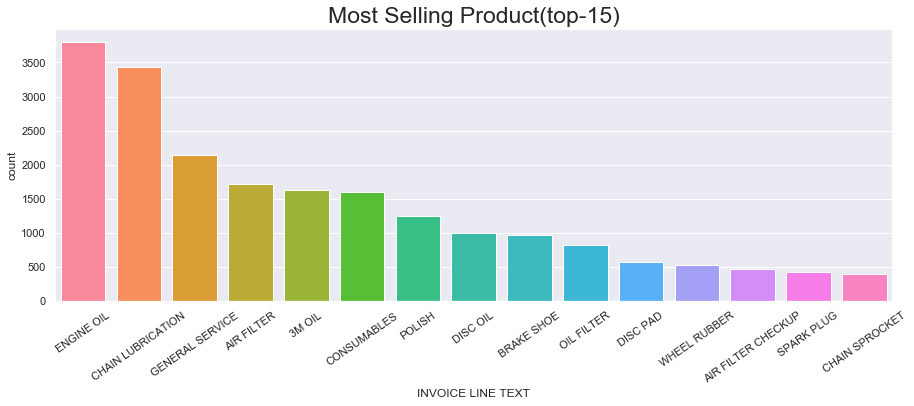

In [23]:
plt.figure(figsize=(15,5));
sns.countplot(df['INVOICE LINE TEXT'],order=df['INVOICE LINE TEXT'].value_counts().index[:15],saturation=10);
plt.xticks(rotation=35);
plt.title("Most Selling Product(top-15)",fontdict={"fontsize":23});

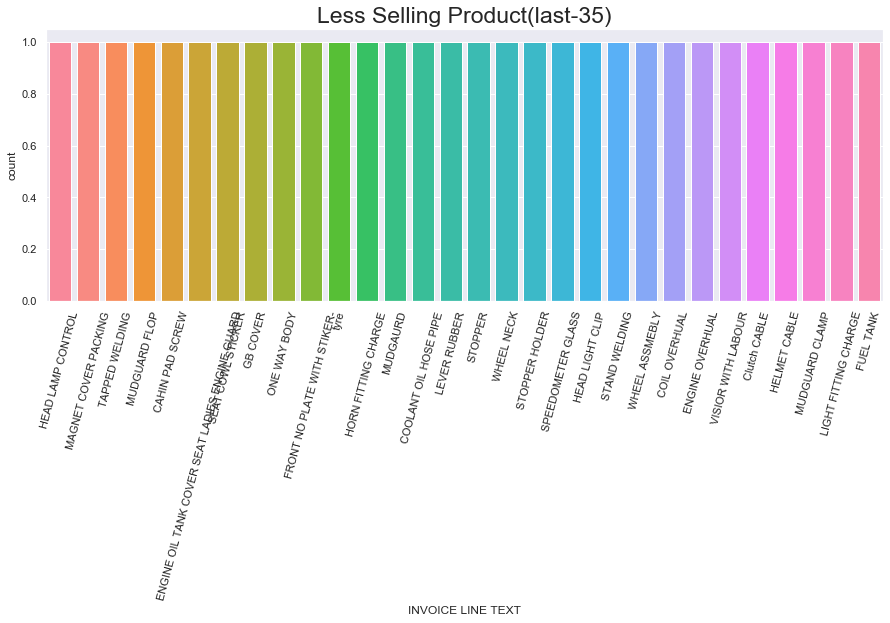

In [24]:
plt.figure(figsize=(15,5));
sns.countplot(df['INVOICE LINE TEXT'],order=df['INVOICE LINE TEXT'].value_counts().index[-30:],saturation=10);
plt.xticks(rotation=75);
plt.title("Less Selling Product(last-35)",fontdict={"fontsize":23});

In [25]:
#max(Counter(df['Current KM Reading']))
#Counter(df['Business Partner Name'])

In [26]:
df.head(10)

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT,date_diff
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,2
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,2
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,2
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,2
5,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CHAIN LUBRICATION,2
6,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,4 WAY SWITCH,2
7,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL,0
8,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,3M OIL,0
9,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,CHAIN LUBRICATION,0


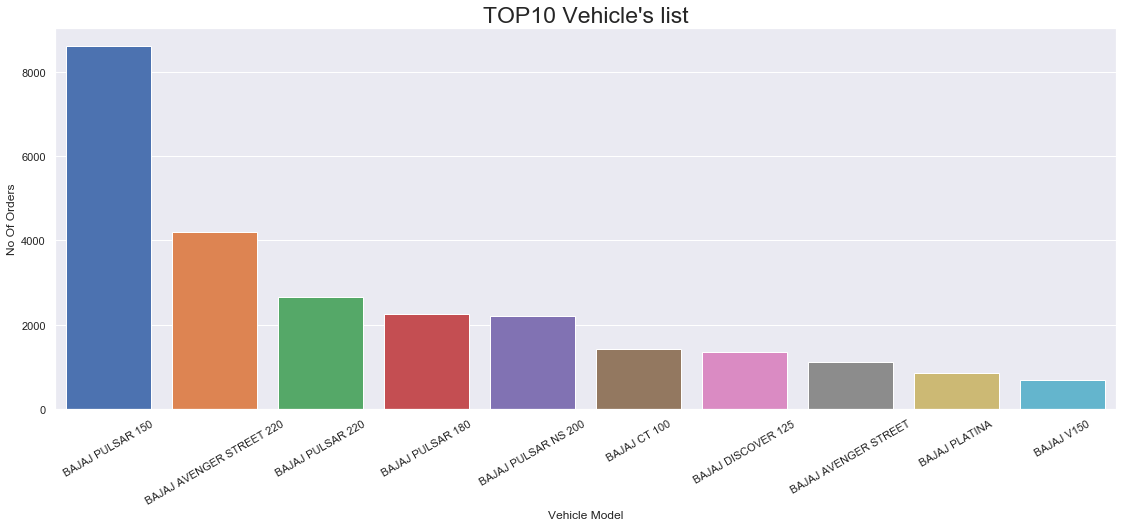

In [27]:
plt.figure(figsize=[19,7])
sns.countplot(df['Vehicle Model'],order=df['Vehicle Model'].value_counts().iloc[:10].index,saturation=10)
plt.xlabel("Vehicle Model")
plt.ylabel('No Of Orders');
plt.xticks(rotation=30)
plt.title("TOP10 Vehicle's list",fontdict={'fontsize':23});

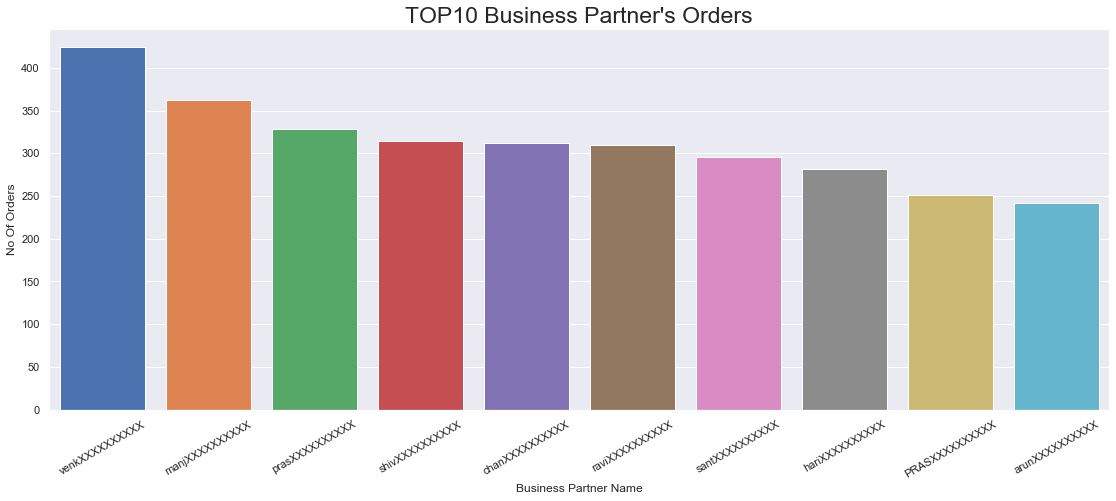

In [28]:
plt.figure(figsize=[19,7])
sns.countplot(df['Business Partner Name'],order=df['Business Partner Name'].value_counts().index[:10],saturation=10)
plt.xlabel("Business Partner Name")
plt.ylabel('No Of Orders');
plt.xticks(rotation=30)
plt.title("TOP10 Business Partner's Orders",fontdict={'fontsize':23});